# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


original_df = pd.read_csv(airbnbDataSet_filename)

original_df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the Airbnb NYC "listings" data set.
2. I will be predicting the price of an AirBnB. Specifically, the label will be the 'price' column of the data set.
3. This is a supervised learning problem because I will be giving the model the features and label. It is a regression problem, as the given prices are continuous floating point values, so it would make sense to also output the predicted price within a continuous range.
4. Right now, I am thinking that the features should be: host_is_superhost, neighbourhood_group_cleansed, room_type, accomodates, bathrooms, bedrooms, beds, amenities, and minimum_nights. Of course, these may change as I explore the data.
5. This model, which predicts future prices of AirBnB listings, can be used in many ways. Hosts can use this model to determine the optimal price for the Airbnb they are planning to list. AirBnB can also use this model to determine optimal pricings for their listings, as well as promote listings that have appropriate pricing so that users will be more inclined to book that listing. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. I plan to use the data preparation techniques of: addressing missingness, finding and replacing outliers, renaming features and labels, one-hot encoding, replacing boolean values with numeric values, and selecting appropriate features and removing irrelevant features.
2. Since this is a regression problem, I need to perform model selection on these models: KNN, Linear Regression, Decision Tree, Random Forest, and GBDT. Although, KNN is not the best for data with many dimensions, so I may not include that. For now, I feel like my data is ready for those models. However, if I choose linear regression or KNN, I may need to scale my data, since they make decisions using distance.
3. Since all my model candidates are being used for regression, I will use the Mean Squared Error (MSE) loss function and the R2 value. 

In [3]:
df = original_df.copy()

In [4]:
# replacing column names

df.rename(columns={"price": "label_price"}, inplace=True)

In [5]:
# replacing missing values with means

print(df.isna().sum())

# numeric values
cols_to_replace = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds']
df[cols_to_replace] = df[cols_to_replace].fillna(df[cols_to_replace].mean())

# string values
df.replace("", np.nan, inplace=True)
str_cols_to_replace = ['name','description','neighborhood_overview','host_name', 'host_location','host_about']
df[str_cols_to_replace] = df[str_cols_to_replace].fillna("Unknown")

print(df.isna().sum())
df.head(20)

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,Unknown,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.000000,1.000000,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,0.906901,0.791953,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.000000,1.000000,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,Unknown,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.000000,1.000000,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",Cyn,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,1.000000,1.000000,True,3.0,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,"New York, New York, United States",I have lived in the same apartment in Brooklyn...,1.000000,0.000000,True,2.0,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",Jane,"New York, New York, United States",I have been an Airbnb host since 2009 -- just ...,1.000000,0.990000,True,1.0,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


In [6]:
# finding and replacing outliers

import scipy.stats as stats

numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: stats.mstats.winsorize(x, limits=[0.01, 0.01]))

df.head(20)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,Unknown,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.000000,1.000000,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,0.906901,0.791953,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.000000,1.000000,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,Unknown,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.000000,1.000000,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",Cyn,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,1.000000,1.000000,True,3.0,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,"New York, New York, United States",I have lived in the same apartment in Brooklyn...,1.000000,0.000000,True,2.0,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",Jane,"New York, New York, United States",I have been an Airbnb host since 2009 -- just ...,1.000000,0.990000,True,1.0,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


In [7]:
# one-hot encoding

print(df.select_dtypes(include='object').nunique())
print(df['neighbourhood_group_cleansed'].unique())
print(df['room_type'].unique())

df = pd.get_dummies(df, columns=['neighbourhood_group_cleansed','room_type'], dtype=int)
df.head()

name                            27387
description                     25953
neighborhood_overview           15801
host_name                        7566
host_location                    1365
host_about                      11963
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,True,8.0,...,9,0,0,1,0,0,1,0,0,0
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,True,1.0,...,6,0,1,0,0,0,1,0,0,0
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,Unknown,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,True,1.0,...,3,0,1,0,0,0,1,0,0,0
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.000000,1.000000,True,1.0,...,4,0,0,1,0,0,0,0,1,0
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,0.906901,0.791953,True,1.0,...,7,0,0,1,0,0,0,0,1,0


In [8]:
# replace booleans with numeric values

df = df.replace({'true': 1, 'false': 0, True: 1, False: 0})

In [9]:
# adding "amenity_count" as a feature to improve model performance

df['amenity_count'] = df['amenities'].apply(lambda x: len(x.split(',')))

<AxesSubplot: >

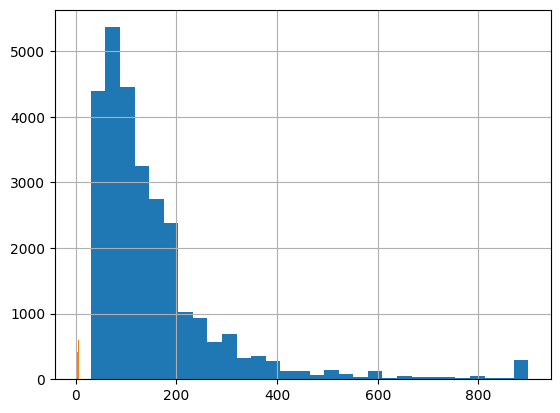

In [10]:
# applying the log function to the price column to reduce the skew

df['label_price'].hist(bins=30) # skewed
df['log_label_price'] = np.log1p(df['label_price']) 
df['log_label_price'].hist(bins=30) # not skewed

<AxesSubplot: >

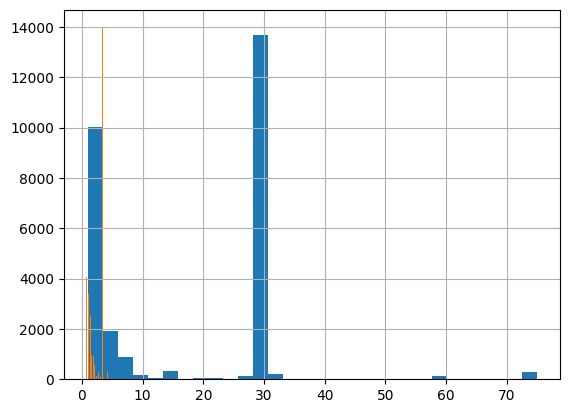

In [11]:
# applying the log function to the minimum_nights column to reduce the skew

df['minimum_nights'].hist(bins=30) # skewed
df['log_min_nights'] = np.log1p(df['minimum_nights']) 
df['log_min_nights'].hist(bins=30) # less skewed

In [12]:
# selecting appropriate features and dropping irrelevant features

# checking correlation of features to label
exclude = ['log_label_price','label_price','minimum_nights']
corrs = df.corr()['log_label_price'].drop(exclude, axis = 0)
corrs_sorted = corrs.sort_values(ascending=False)
print(corrs_sorted)

# keeping relevant features
cols_to_keep = ["log_label_price","accommodates","bedrooms","beds","bathrooms","amenity_count","availability_90","neighbourhood_group_cleansed_Brooklyn", "neighbourhood_group_cleansed_Staten Island","neighbourhood_group_cleansed_Bronx","neighbourhood_group_cleansed_Queens","neighbourhood_group_cleansed_Manhattan","room_type_Entire home/apt","room_type_Shared room","room_type_Hotel room","room_type_Private room","log_min_nights","host_is_superhost"]
df = df[cols_to_keep]

# dropping irrelevant features
print(df['host_is_superhost'].unique()) # only value is "True", no relation to the label
cols_to_drop = ['host_is_superhost']
df = df.drop(columns=cols_to_drop)

df.head()

accommodates                                    0.557967
room_type_Entire home/apt                       0.550682
bedrooms                                        0.458139
beds                                            0.420801
neighbourhood_group_cleansed_Manhattan          0.300557
amenity_count                                   0.215763
bathrooms                                       0.199305
review_scores_location                          0.155194
availability_90                                 0.140599
availability_60                                 0.139602
review_scores_cleanliness                       0.132109
availability_30                                 0.120960
availability_365                                0.113833
room_type_Hotel room                            0.104389
calculated_host_listings_count_entire_homes     0.100943
number_of_reviews_ltm                           0.086386
review_scores_rating                            0.082625
number_of_reviews_l30d         

,log_label_price,accommodates,bedrooms,beds,bathrooms,amenity_count,availability_90,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Staten Island,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Manhattan,room_type_Entire home/apt,room_type_Shared room,room_type_Hotel room,room_type_Private room,log_min_nights
0,5.017280,1,1.329708,1.0,1.0,31,63,0,0,0,0,1,1,0,0,0,3.433987
1,4.330733,3,1.000000,3.0,1.0,35,18,1,0,0,0,0,1,0,0,0,0.693147
2,5.620401,4,2.000000,2.0,1.5,14,12,1,0,0,0,0,1,0,0,0,1.791759
3,4.234107,2,1.000000,1.0,1.0,25,34,0,0,0,0,1,0,0,0,1,1.098612
4,4.330733,1,1.000000,1.0,1.0,16,0,0,0,0,0,1,0,0,0,1,1.098612


In [13]:
# SECOND ITERATION -- dropping the irrelevant features, according to the feature importance analysis after training/validating models

df['room_type_is_home_apt'] = df['room_type_Entire home/apt']
df = df.drop(columns=['room_type_Entire home/apt','room_type_Shared room','room_type_Hotel room','room_type_Private room'])

df['in_manhattan'] = df['neighbourhood_group_cleansed_Manhattan']
df = df.drop(columns=['neighbourhood_group_cleansed_Brooklyn','neighbourhood_group_cleansed_Staten Island','neighbourhood_group_cleansed_Bronx','neighbourhood_group_cleansed_Queens','neighbourhood_group_cleansed_Manhattan'])

df = df.drop(columns=['beds'])
df.head()

,log_label_price,accommodates,bedrooms,bathrooms,amenity_count,availability_90,log_min_nights,room_type_is_home_apt,in_manhattan
0,5.017280,1,1.329708,1.0,31,63,3.433987,1,1
1,4.330733,3,1.000000,1.0,35,18,0.693147,1,0
2,5.620401,4,2.000000,1.5,14,12,1.791759,1,0
3,4.234107,2,1.000000,1.0,25,34,1.098612,0,1
4,4.330733,1,1.000000,1.0,16,0,1.098612,0,1


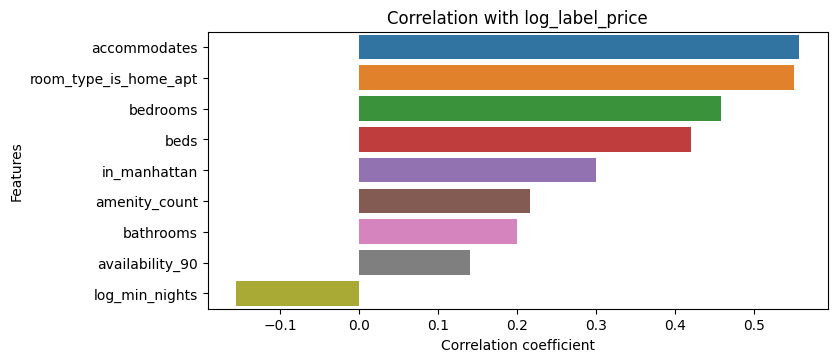

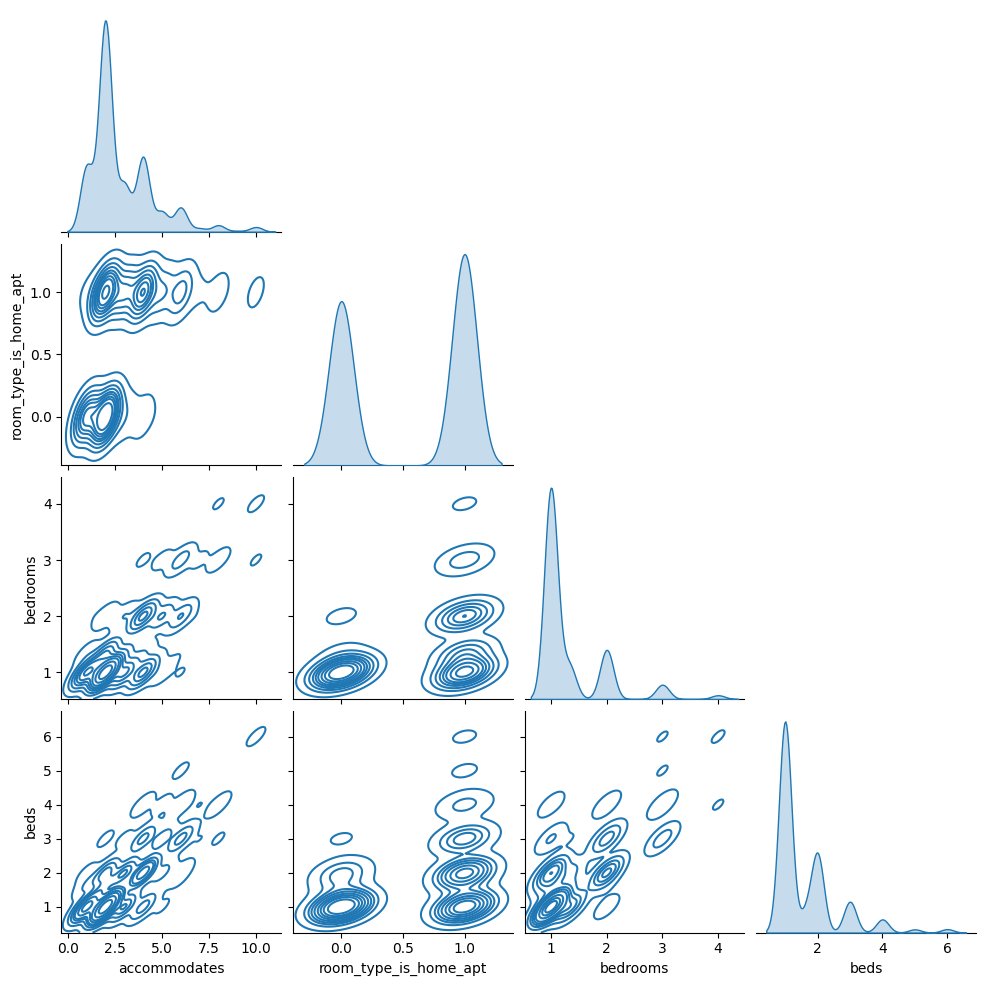

In [14]:
# visualizing relationships between features and the label

# visualizing the correlations between the chosen features and the label using a barplot
new_corrs = df.corr()['log_label_price'].drop(['log_label_price'])
new_corrs_sorted = new_corrs.sort_values(ascending=False)
plt.figure(figsize=(8, len(new_corrs_sorted) * 0.4))
sns.barplot(x=new_corrs_sorted.values, y=new_corrs_sorted.index)
plt.title("Correlation with log_label_price")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

# visualizing the correlations between the chosen features using a pairplot
df_sample = df.sample(3000, random_state=42)
top_features = new_corrs_sorted.head(4).index.tolist()
sns.pairplot(df_sample[top_features], kind="kde", corner=True)

<AxesSubplot: >

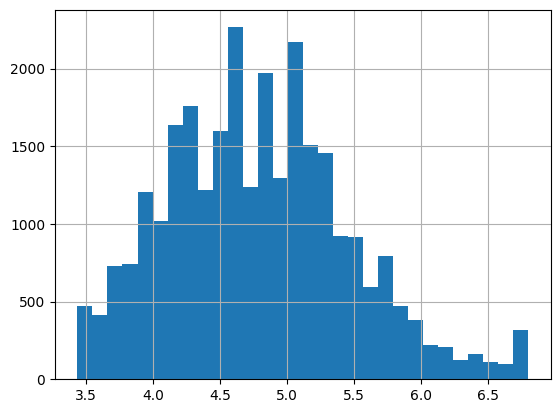

In [14]:
# visualizing the distribution of the label to detect possible skewness

df['log_label_price'].hist(bins=30) # not skewed

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, my new feature list is: ["log_label_price","accommodates","bedrooms","beds","bathrooms","amenity_count","availability_90","neighbourhood_group_cleansed_Brooklyn", "neighbourhood_group_cleansed_Staten Island", "neighbourhood_group_cleansed_Bronx", "neighbourhood_group_cleansed_Queens", "neighbourhood_group_cleansed_Manhattan", "room_type_Entire home/apt","room_type_Shared room","room_type_Hotel room","room_type_Private room","log_min_nights"]

I removed host_is_superhost since there was no variance in that data. I removed the amenities feature and instead added the amenity_counts feature, since that is an easier, yet still effective, predictor of the price. I added availability_90 since that had a large correlation with the label. I also took the log of the price column and the log of the minimum nights column in order to reduce skewness in those columns and result in better predictions.

SECOND ITERATION -- I removed the "beds" column, since according to the feature importance analysis, that column wasn't that important to predicting the label. I combined the neighborhood_groups into one "in_manhattan" column, and combined the room_type columns into one "room_type_is_home_apt" column, for the same reasons. My new feature list is: ["log_label_price","accommodates","bedrooms","bathrooms","amenity_count","availability_90","in_manhattan", "room_type_is_home_apt","log_min_nights"]

2. Since I have already mostly prepared my data in the previous section of this lab, I don't think I need to do any more preparations. But, based on the model candidate I end up choosing, I might need to normalize my data. For example, a linear regression model uses distance to compute loss, so I might need to normalize my data for the linear regression model.  

3. Since my project is solving a regression problem, I am going to have multiple model candidates, all of which are desgined for regression problems: linear regression, decision trees, random forest, and GBDT.

4. After normalizing my data, I will train and validate each model. For the Decision Tree, Random Forest, and Gradient Boosted Decision Tree models, I will use grid search cross validation to choose the optimized hyparameters, train each model, and validate each model. For the Linear Regression model, I will use standard cross-validation to validate the model. After all this, I will visualize the model performances, analyze feature importance, and do a second iteration of feature engineering and model training/validation. Finally, I will evaluate (test) the four models and visualize model performances to choose the best one. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [16]:
df.head(10)
df.shape

(28022, 9)

In [17]:
# Normalizing the data

numeric_cols = df.select_dtypes(include=['number']).columns
not_bool_cols = []
for col in numeric_cols:
    unique_vals = df[col].unique()
    if set(unique_vals) != {0,1}:
        not_bool_cols.append(col)
df[not_bool_cols] = df[not_bool_cols].apply(stats.zscore)
df.head(10)

,log_label_price,accommodates,bedrooms,bathrooms,amenity_count,availability_90,log_min_nights,room_type_is_home_apt,in_manhattan
0,0.342506,-1.072559,0.011091,-0.375238,0.583379,0.873381,0.888777,1,1
1,-0.660357,0.087875,-0.519828,-0.375238,0.930617,-0.458538,-1.465818,1,0
2,1.223507,0.668093,1.090440,0.953073,-0.892383,-0.636127,-0.522025,1,0
3,-0.801503,-0.492342,-0.519828,-0.375238,0.062522,0.015034,-1.117492,0,1
4,-0.660357,-1.072559,-0.519828,-0.375238,-0.718764,-0.991305,-1.117492,0,1
5,-0.274158,-0.492342,-0.519828,0.953073,2.232761,0.399810,-0.678653,0,0
6,-0.413381,0.087875,0.011091,-0.375238,0.322951,-0.103359,0.888777,1,0
7,-0.934388,-1.072559,-0.519828,-0.375238,-0.545145,0.015034,0.888777,0,1
8,-0.397240,-1.072559,-0.519828,-0.375238,-1.066002,-0.310547,0.801338,0,0
9,0.753028,0.668093,-0.519828,-0.375238,1.017427,0.873381,-1.117492,1,0


In [18]:
# Split the data into training and testing

y = df['log_label_price']
X = df.drop(columns=['log_label_price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train the Linear Regression Model

model = LinearRegression()
lr_model = model.fit(X_train, y_train)

In [20]:
# Validate the Linear Regression Model

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
lr_r2 = scores.mean()
print("Mean R²:", lr_r2)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
lr_rmse = scores.mean()
print("Mean MSE:", -lr_rmse)

Mean R²: 0.5234646371086635
Mean MSE: 0.4655868540214767


In [21]:
# Train the Decision Tree Model using GridSearch

param_grid = {'max_depth':[3,5,7,10], 'min_samples_split':[5,10,15], 'min_samples_leaf':[5,15,20,25,50]}

print('Running Grid Search...')
dt_regressor = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)
print("Done")
dt_best_params = dt_grid_search.best_params_
print(dt_best_params)

dt_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=15, min_samples_split=5)
dt_model.fit(X_train, y_train)

Running Grid Search...
Done
{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=10, min_samples_leaf=15, min_samples_split=5)

In [22]:
# Validate the Decision Tree Model 

scores = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
dt_r2 = scores.mean()
print("Mean R²:", dt_r2)
scores = cross_val_score(dt_model, X, y, cv=5, scoring='neg_mean_squared_error')
dt_rmse = scores.mean()
print("Mean MSE:", -dt_rmse)

Mean R²: 0.5556679078180771
Mean MSE: 0.43197853248609175


In [23]:
# Train the Random Forest Model using GridSearch

param_grid = {'n_estimators': [100, 300], 'max_depth': [7, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [25, 50]}

print('Running Grid Search...')
rf_regressor = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_train, y_train)
print("Done")
rf_best_params = rf_grid_search.best_params_
print(rf_best_params)

rf_model = RandomForestRegressor(max_depth=10, min_samples_leaf=25, min_samples_split=2, n_estimators=300)
rf_model.fit(X_train, y_train)

Running Grid Search...
Done
{'max_depth': 10, 'min_samples_leaf': 25, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(max_depth=10, min_samples_leaf=25, n_estimators=300)

In [24]:
# Validate the Random Forest Model

scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
rf_r2 = scores.mean()
print("Mean R²:", rf_r2)
scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_rmse = scores.mean()
print("Mean MSE:", -rf_rmse)

Mean R²: 0.5810943702090077
Mean MSE: 0.4070089887591686


In [27]:
# Train the Gradient Boosted Decision Trees Model using GridSearch

param_grid = {'n_estimators': [100, 300], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [5, 20]}

print('Running Grid Search...')
gbdt_regressor = GradientBoostingRegressor(random_state=42)
gbdt_random = RandomizedSearchCV(gbdt_regressor, param_grid, n_iter=20, cv=3)
gbdt_random_search = gbdt_random.fit(X_train, y_train)
print("Done")
gbdt_best_params = gbdt_random_search.best_params_
print(gbdt_best_params)

gbdt_model = GradientBoostingRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=20, max_depth=5, learning_rate=0.05)
gbdt_model.fit(X_train, y_train)

Running Grid Search...
Done
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': 5, 'learning_rate': 0.05}


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=20,
                          n_estimators=300)

In [28]:
# Validating the GBDT

scores = cross_val_score(gbdt_model, X, y, cv=5, scoring='r2')
gbdt_r2 = scores.mean()
print("Mean R²:", gbdt_r2)
scores = cross_val_score(gbdt_model, X, y, cv=5, scoring='neg_mean_squared_error')
gbdt_rmse = scores.mean()
print("Mean MSE:", -gbdt_rmse)

Mean R²: 0.5914306063385328
Mean MSE: 0.3961929568039685


Text(0, 0.5, 'RMSE/R2')

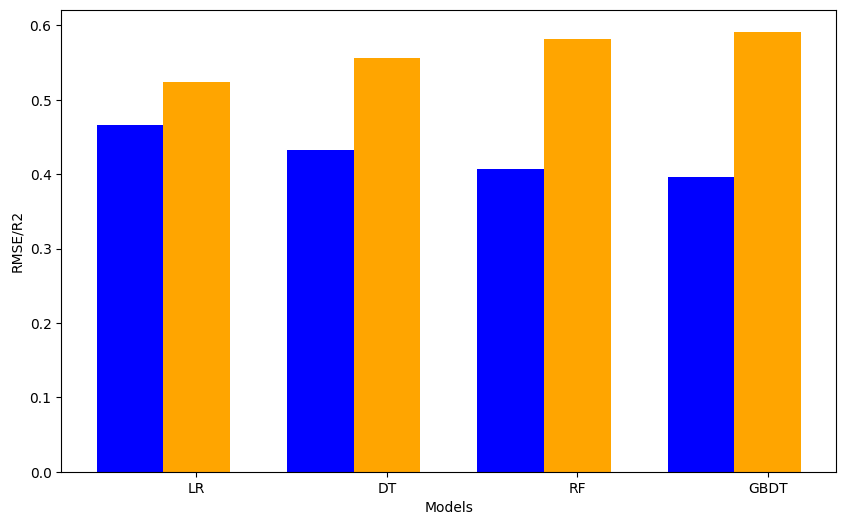

In [29]:
# Visualize and Compare Model Validation Performance

RMSE_Results = [-lr_rmse, -dt_rmse, -rf_rmse, -gbdt_rmse]
R2_Results = [lr_r2, dt_r2, rf_r2, gbdt_r2]

rg = np.arange(4)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(rg - width/2, RMSE_Results, width, label='RMSE', color='blue')

rects2 = ax.bar(rg + width/2, R2_Results, width, label='R2', color='orange')

labels = ['LR', 'DT', 'RF', 'GBDT']
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")

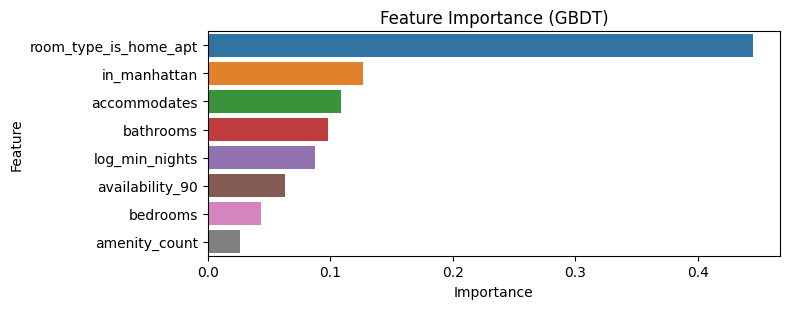

In [30]:
# Analyzing feature importance for GBDT
# (after validation, GBDT is the best model so far, so I am doing some more feature engineering to improve the model before final evaluation)

importances = gbdt_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, len(importance_df) * 0.4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (GBDT)")
plt.tight_layout()
plt.show()

Based on this diagram, I will make these changes to my features above, under the comment "SECOND ITERATION":
- Drop the "beds" column
- Only have one "room_type" column
- Only have one "neighborhood_group" column

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

At this point, I have made the feature changes under the "SECOND ITERATION" comments, and re-trained and re-validated my models. 
The results slightly improved.
Now, I am moving on to the final evaluation of my models.

In [31]:
# Test the LR Model

y_lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)
print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.6692064574955674
[LR] R2: 0.5535924469613431


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
# Test the DT Model

y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, y_dt_pred)
dt_r2 = r2_score(y_test, y_dt_pred)
print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.38278744416989635
[DT] R2: 0.6184346126006686


In [33]:
# Test the RF Model

y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))              

[RF] Root Mean Squared Error: 0.37070813573117434
[RF] R2: 0.6304753575993245


In [34]:
# Test the GBDT Model

y_gbdt_pred = gbdt_model.predict(X_test)
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)
print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 

[GBDT] Root Mean Squared Error: 0.35817735191132205
[GBDT] R2: 0.6429661366346919


Text(0, 0.5, 'RMSE/R2')

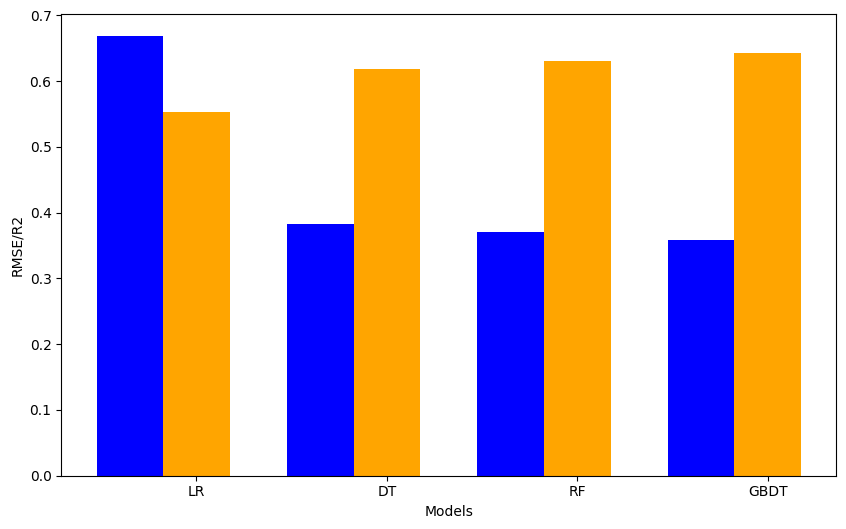

In [35]:
# Visualize and Compare Model Performance After Evaluation

RMSE_Results = [lr_rmse, dt_rmse, rf_rmse, gbdt_rmse]
R2_Results = [lr_r2, dt_r2, rf_r2, gbdt_r2]

rg = np.arange(4)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(rg - width/2, RMSE_Results, width, label='RMSE', color='blue')

rects2 = ax.bar(rg + width/2, R2_Results, width, label='R2', color='orange')

labels = ['LR', 'DT', 'RF', 'GBDT']
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")

### Analysis (comparing and contrasting the resulting R2 and RSME scores of all the model candidates).

In an optimal model, you want the R2 (how much of the variance in the label is explained by the model) to be as high as possible and the RMSE (the error) to be as low as possible. From the diagram, we can see that the Linear Regression model is the worst, because its RMSE is higher than its R2, and much higher than the RMSE of all the other models. It also seems like the LR model is slightly overfitting, since it performed relatively well during training/validation, but performed worse on the test set, with approximately 20% more loss. For the DT model, its RMSE is slightly higher, and its R2 is slightly lower, than the two ensemble models (RF and GBDT). The ensemble models both perform relatively well. The best model is GBDT, followed by RF, followed by DT, followed by LR. This is based on the order of decreasing RMSE and increasing R2. 

In conclusion, the GBDT model, with 300 estimators and a learning rate of 0.05, was the best for predicting the price of Airbnbs, based on the features: ["accommodates","bedrooms","bathrooms","amenity_count","availability_90","in_manhattan", "room_type_is_home_apt","log_min_nights"], with a Root Mean Squared Error of 0.35817735191132205, and an R2 of 0.6429661366346919.

### To improve model performance in the future, I will...
- Find an Airbnb dataset online with less noise in its features.
- Instead of, or in addition to, adding the "amenities_count" feature, I can use "amenities" as an actual feature, using NLP to process and vectorize the list of amenities as input to the model. 
- Look into more powerful versions of GBDT, like XGBoost or LightGBM.